홍수 데이터(샘플 데이터)로 물을 segmentation 해봅시다. 

https://aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100


이미지를 살펴봅시다


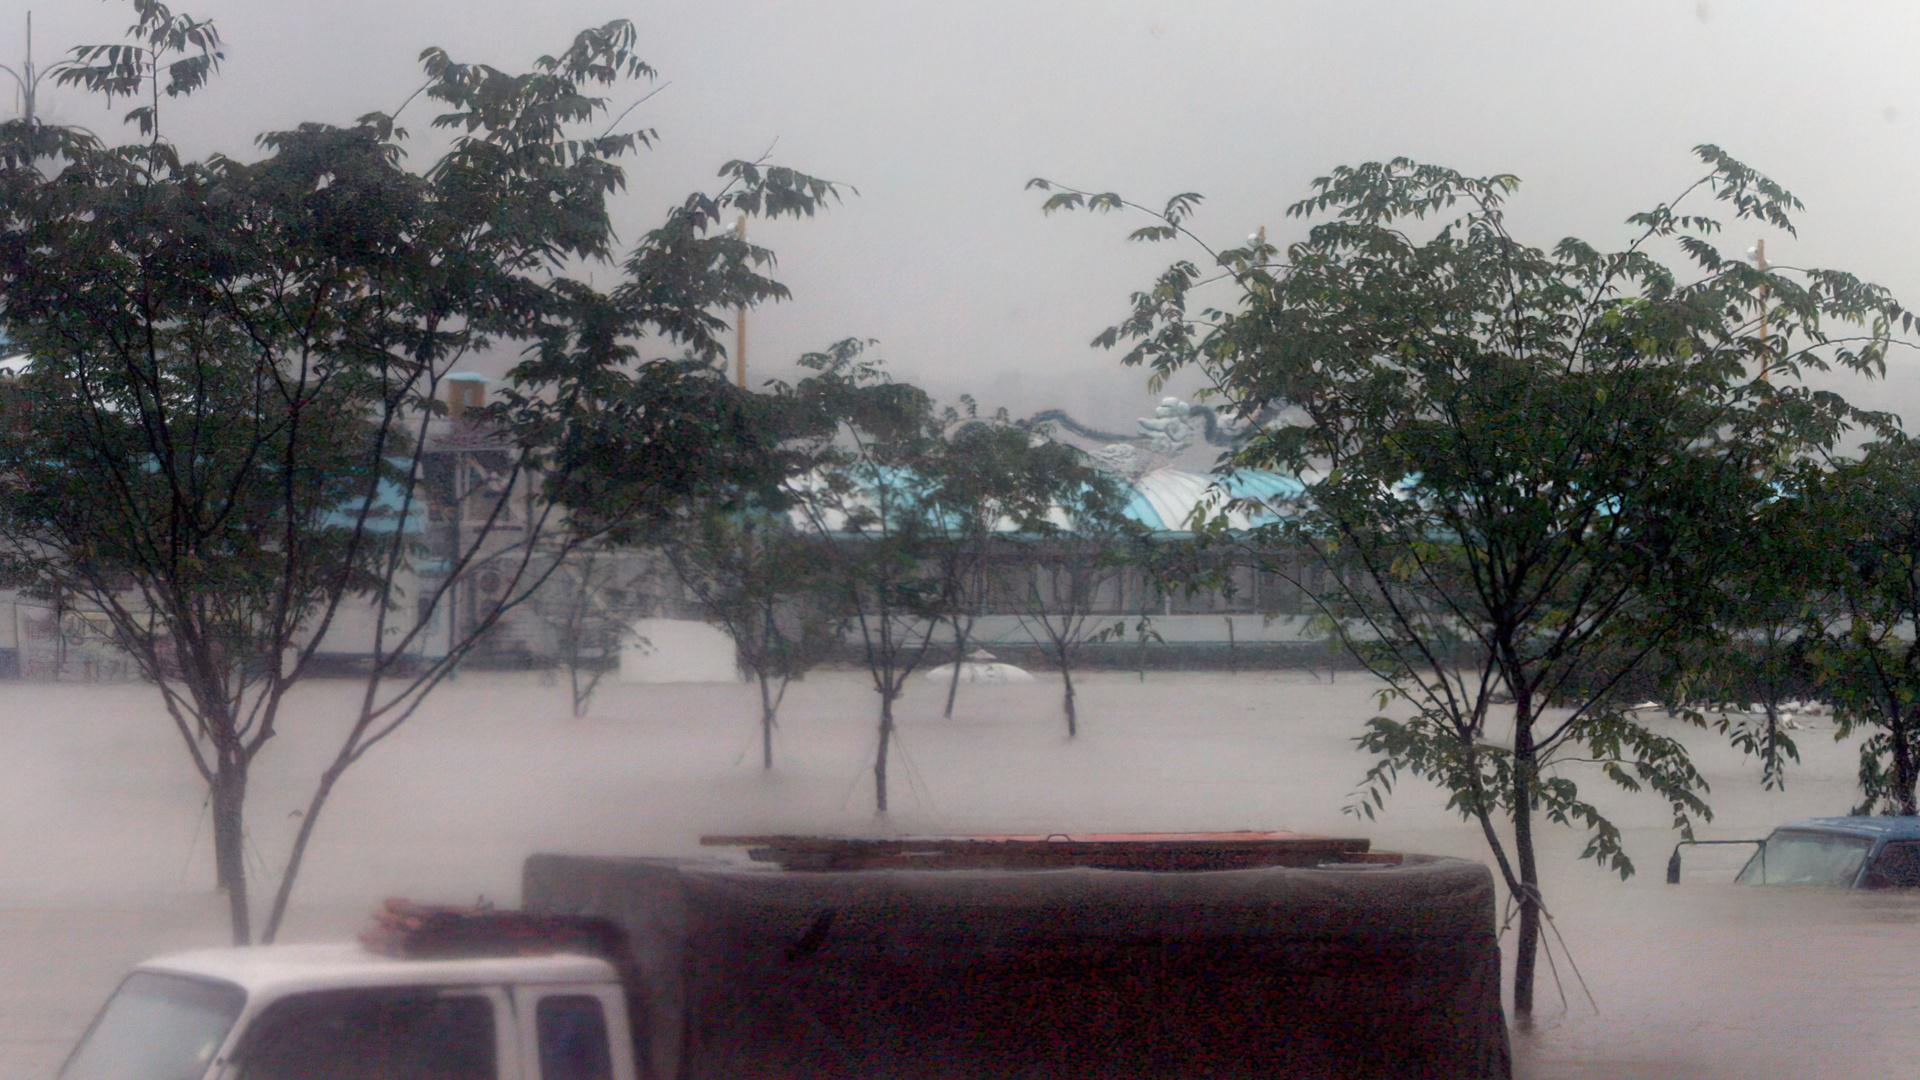

In [1]:
from PIL import Image

image = Image.open("/content/drive/MyDrive/Teaching/DL 202301/홍수/원천데이터/TS/03/03/11/03_03_11_6000003.jpg")
image.show()

학습데이터셋의 라벨 파일을 불러와봅시다

In [2]:
import json

file = '/content/drive/MyDrive/Teaching/DL 202301/홍수/라벨링데이터/TL/03/03/03_03_11_6000003.json'
with open(file, 'r') as f:  # r은 읽기 모드
  labels_data = json.load(f)  #json 파일 읽기

In [3]:
labels_data

{'info': {'description': 'FLOOD Dataset',
  'version': '1.8.0',
  'year': 2022,
  'contributor': 'Smartcoop Consortium',
  'date_created': '2022/02/08'},
 'images': [{'id': 459367,
   'width': 1920,
   'height': 1080,
   'code': '3030311',
   'file_name': '03_03_11_6000003.jpg',
   'device': 'camera'}],
 'annotations': [{'id': 1,
   'iscrowd': 0,
   'image_id': 459367,
   'supercategory': 'common',
   'category_id': 30311,
   'category': 'common_tree_level2',
   'segmentation': [[1511.69,
     1017.66,
     1522.6,
     910.13,
     1480.52,
     824.42,
     1458.7,
     813.51,
     1446.23,
     804.16,
     1438.44,
     788.57,
     1419.74,
     766.75,
     1407.27,
     779.22,
     1394.81,
     794.81,
     1379.22,
     808.83,
     1363.64,
     825.97,
     1349.61,
     815.06,
     1341.82,
     808.83,
     1357.4,
     779.22,
     1369.87,
     763.64,
     1371.43,
     757.4,
     1357.4,
     748.05,
     1360.52,
     734.03,
     1369.87,
     716.88,
     1382.3

필요 정보만 가져와 봅시다

In [4]:
labels = []
for label in labels_data['annotations']:  
  class_id = label['category_id']
  class_name = label['category']
  for seg in label['segmentation']:
      
    bbox = label['bbox']
    polygon = label['segmentation']
    labels.append([class_id, class_name, bbox, polygon])

In [5]:
labels[0]

[30311,
 'common_tree_level2',
 [1030.13, 141.82, 889.87, 875.84],
 [[1511.69,
   1017.66,
   1522.6,
   910.13,
   1480.52,
   824.42,
   1458.7,
   813.51,
   1446.23,
   804.16,
   1438.44,
   788.57,
   1419.74,
   766.75,
   1407.27,
   779.22,
   1394.81,
   794.81,
   1379.22,
   808.83,
   1363.64,
   825.97,
   1349.61,
   815.06,
   1341.82,
   808.83,
   1357.4,
   779.22,
   1369.87,
   763.64,
   1371.43,
   757.4,
   1357.4,
   748.05,
   1360.52,
   734.03,
   1369.87,
   716.88,
   1382.34,
   716.88,
   1396.36,
   723.12,
   1405.71,
   716.88,
   1407.27,
   707.53,
   1391.69,
   709.09,
   1377.66,
   698.18,
   1374.55,
   688.83,
   1374.55,
   674.81,
   1341.82,
   648.31,
   1312.21,
   646.75,
   1296.62,
   623.38,
   1298.18,
   596.88,
   1268.57,
   579.74,
   1243.64,
   578.18,
   1232.73,
   590.65,
   1190.65,
   598.44,
   1154.81,
   579.74,
   1162.6,
   543.9,
   1187.53,
   504.94,
   1201.56,
   478.44,
   1215.58,
   455.06,
   1231.17,
   433.

라벨을 출력해보고 포멧 형식을 확인해봅시다


In [6]:
from PIL import ImageDraw, Image, ImageFont

# 이미지 불러오기, 투명도 적용을 위해 RGBA 형태로 변환
image = Image.open("/content/drive/MyDrive/Teaching/DL 202301/홍수/원천데이터/TS/03/03/11/03_03_11_6000003.jpg")
draw = ImageDraw.Draw(image, 'RGBA')  

# 이미지 사이즈 가져오기
width, height = image.size

for label in labels:
  class_name = label[1] # class name
  bbox = label[2]  # x,y,w,h
  polygon = label[3][0]

  # 텍스트를 박스 중간에 찍기
  x_center = bbox[0] + bbox[2]*.5
  y_center = bbox[1] + bbox[3]*.5

  draw.rectangle(((bbox[0], bbox[1]),(bbox[0]+bbox[2],bbox[1]+bbox[3])), outline = 'red', width = 2)
  draw.polygon(polygon, fill=(255, 0, 0, 100), outline=(0, 0, 0) ) # R,G,B,A 투명도 0~255
  draw.text((x_center,y_center), class_name,fill = (0,0,255))

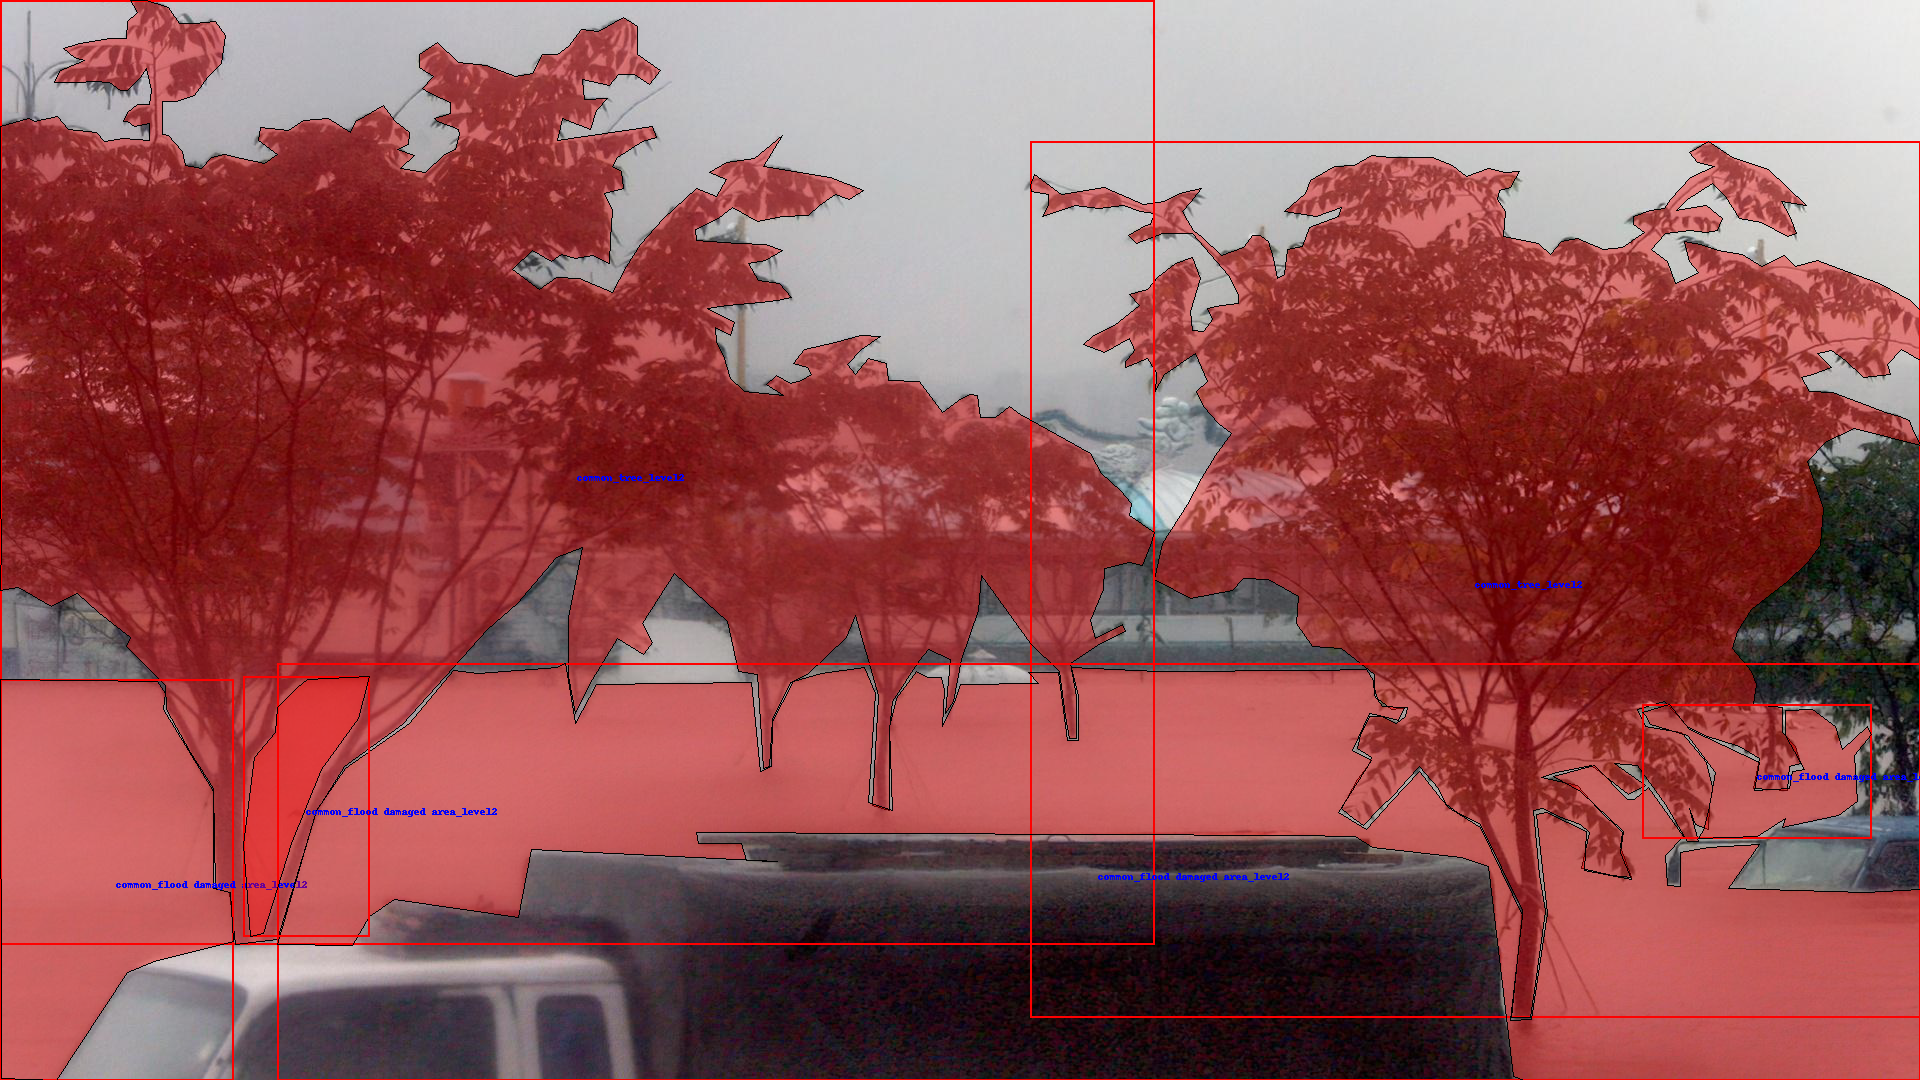

In [7]:
image.show()

데이터를 확인했으니, 이제 변환해봅시다

변환된 라벨을 저장할 폴더를 만들어둡니다 .

In [37]:
import os

def to_yolo_seg(file, path_save):
  with open(file, 'r') as f:  # r은 읽기 모드
    label = json.load(f)  #json 파일 읽기

  # 이미지 사이즈 추출
  img_width = label['images'][0]['width']
  img_height = label['images'][0]['height']

  # 저장할 파일 만들기
  filename, ext = os.path.splitext(os.path.basename(file))
  file_save = path_save + filename + '.txt'
  with open(file_save, 'w') as f:

    for i in label['annotations']:
        inner_list = []  

      # 클래스 정보

        class_id = i['category_id']
        inner_list.append(class_id)
        
        # range(start, end, step), 스텝을 사용할 때는 start 생략 불가능

        # polygon 저장(list comprehension이 아닌 반복문으로 작성해본 것임)     
        for j in range(0,len(i['segmentation'][0]),2):  
                
          x = i['segmentation'][0][j]/img_width
          y = i['segmentation'][0][j+1]/img_height
          
          inner_list.append(x)
          inner_list.append(y)
        
        # 1개의 어노테이션을 1줄로 저장
        line = ' '.join(str(elem) for elem in inner_list)
        f.write(line + '\n')


In [39]:
folder_path = "/content/drive/MyDrive/Teaching/DL 202301/홍수/라벨링데이터/TL/03/03"
save_path = '/content/drive/MyDrive/Teaching/DL 202301/홍수/label_yolo/'
for item_name in os.listdir(folder_path):
    file = os.path.join(folder_path, item_name)
    print(file)
    if os.path.isfile(file):  # 파일인 경우에만 출력
        to_yolo_seg(file, save_path)

/content/drive/MyDrive/Teaching/DL 202301/홍수/라벨링데이터/TL/03/03/03_03_11_6000478.json
/content/drive/MyDrive/Teaching/DL 202301/홍수/라벨링데이터/TL/03/03/03_03_11_6000410.json
/content/drive/MyDrive/Teaching/DL 202301/홍수/라벨링데이터/TL/03/03/03_03_11_6000281.json
/content/drive/MyDrive/Teaching/DL 202301/홍수/라벨링데이터/TL/03/03/03_03_11_6000287.json
/content/drive/MyDrive/Teaching/DL 202301/홍수/라벨링데이터/TL/03/03/03_03_11_6000886.json
/content/drive/MyDrive/Teaching/DL 202301/홍수/라벨링데이터/TL/03/03/03_03_11_6000088.json
/content/drive/MyDrive/Teaching/DL 202301/홍수/라벨링데이터/TL/03/03/03_03_11_6000108.json
/content/drive/MyDrive/Teaching/DL 202301/홍수/라벨링데이터/TL/03/03/03_03_11_6000573.json
/content/drive/MyDrive/Teaching/DL 202301/홍수/라벨링데이터/TL/03/03/03_03_11_6000519.json
/content/drive/MyDrive/Teaching/DL 202301/홍수/라벨링데이터/TL/03/03/03_03_11_6001056.json
/content/drive/MyDrive/Teaching/DL 202301/홍수/라벨링데이